# **Pipeline**

This book will take a look at the pipeline flow of the lane detection algorithm.

## **Imports**

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.calibration import Calibration
from src.transform import Transform
from src.threshold import Threshold
from src.lines import Lines

## **Putting it Together**

Now that we have worked through how the algorithm works, let's put everything together and run the pipeline on a new test image.

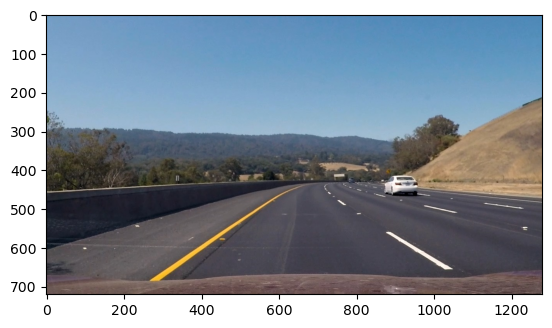

In [7]:
orig_img = cv2.imread('test_images/test3.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(orig_img)

Let's quickly summarize what the pipeline will be doing:

1) Initialize classes
2) Remove image distortion using calibration parameters
3) Transform front-view of region of interest into bird's-eye view
4) Apply binary thresholding
5) Fit and draw curves for the lane lines
6) Transform lane lines image from bird's-eye view to front view
7) Add lane lines image to original image

## **Initialize Classes**

First we need to initialize the classes in each helper script in order to perform the operations.

In [10]:
calibration = Calibration('camera_cal/', (9, 6))
transform = Transform()
threshold = Threshold()
lines = Lines()

## **Calibrate Image**

The first image manipulation technique used is to apply a distortion reduction by using camera calibration parameters. Below, the left image is the original image and the right image is the undistorted version.

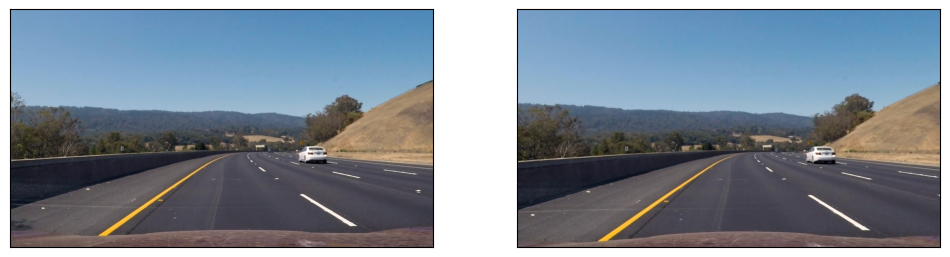

In [11]:
cal_img = calibration.undistort(orig_img)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(orig_img)
axs[1].imshow(cal_img)
fig.set_figwidth(12)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## **Transform Image**

Now that the distortion in the image has been reduced, we want to get the bird's-eye view of the region of interest in the front-view.

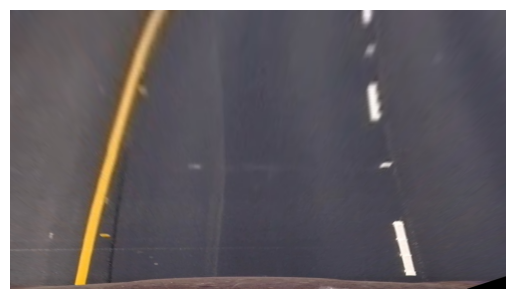

In [12]:
bev_img = transform.orig_to_bev(cal_img)
plt.axis('off')
plt.imshow(bev_img)

## Thresholding Image

From the bird's-eye view, we can apply a binary threshold to separate the lane markers from the road.

>**Note**: The thresholding ranges in the final algorithm are a bit different from what we explored in Book 3 as additional flexibility was needed for the project video.

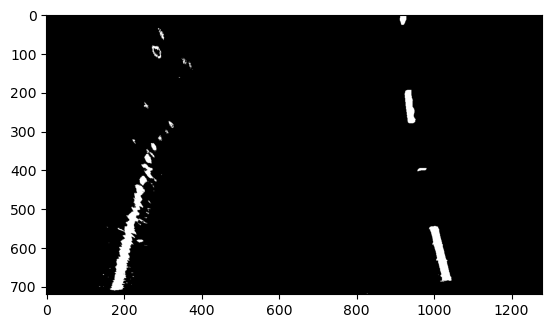

In [15]:
bev_img = cv2.cvtColor(bev_img, cv2.COLOR_RGB2BGR)
thresh_img = threshold.apply_threshold(bev_img)
plt.imshow(thresh_img, cmap='gray')

## Fitting Lines

The threshold image gives us the coordinates of the hot pixels which are used to fit second-degree polynomials for each lane line.

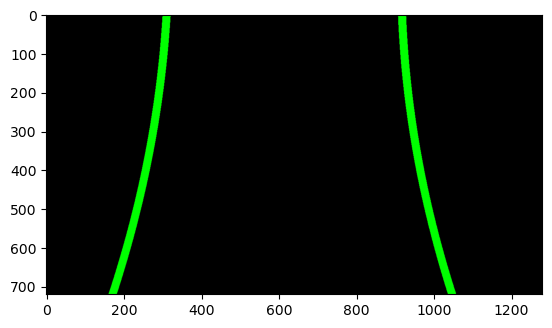

In [18]:
lines_img = lines.sliding_window(thresh_img, False)
plt.imshow(lines_img)

## Transform to Front View

Once we have the lane lines, the image needs to be transformed back into the vehicle front-view perspective.

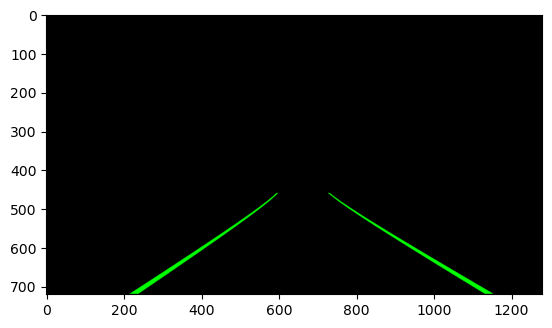

In [19]:
trans_lines_img = transform.bev_to_orig(lines_img)
plt.imshow(trans_lines_img)

## Adding the Lines to the Original Image

After the lane lines have been transformed, they need to be added to the original image.

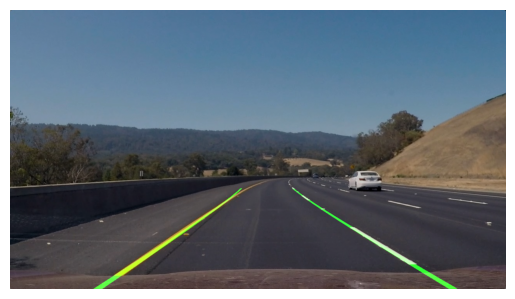

In [20]:
output_img = cv2.addWeighted(orig_img, 0.8, trans_lines_img, 1.0, 0.0)
plt.axis('off')
plt.imshow(output_img)

## **Conclusion**

And there we have it! We have successfully detected the lane lines of the test vehicle using a simple algorithm. Now as well as this works on our test media, if we were to run it on worse road conditions (bad weather, bad lighting, etc.) it would not generalize well. In fact it would do rather poorly as it was developed with a fixed number of images from a single test run. To remedy this, we would have to use more complex computer vision algorithms or deep learning models.

Though increasing robustness and generalization is no easy task with computer vision alone. There exist a great deal of varying road conditions that would need to be accounted for, even with more complex algorithms. The best algorithms right now use deep learning and data from test runs that include high degree of road condition variability.

So why bother with this project? Well, I treat it as a stepping stone into the world of autonomous vehicles.